# Multilabel Classification

In multi-label classification, each sample can have multiple labels associated with it, as opposed to the traditional single-label classification where each sample can have only one label associated with it. <br/>

This means that the output of a multi-label classifier is an array of probabilities, one for each label, indicating the probability of the input sample belonging to each label.

## Setting Up

In [1]:
!nvidia-smi

Sat Jun 29 17:32:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.1/81.1 kB 8.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.1/67.1 kB 3.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 12.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 887.5/887.5 MB 871.3 kB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [4]:
import torch
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


The repository for squad contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/squad.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/StackExchange-Scifi-Tags-Classifier/notebooks/roberta-base/

/content/drive/MyDrive/StackExchange-Scifi-Tags-Classifier/notebooks/roberta-base


## Data

In [7]:
df = pd.read_csv("../../data/question_details.csv")
df.head()

title  \
0                             Would the One Ring even work for anyone but Sauron?   
1                                  Could I fake death to stop being Force-choked?   
2                                                   Who or what was Tom Bombadil?   
3  Why don&#39;t Muggle-born wizards use Muggle technology to fight Death Eaters?   
4                                        Story where the number 3 is the monster?   

                                                                                                                       url  \
0                       https://scifi.stackexchange.com/questions/48180/would-the-one-ring-even-work-for-anyone-but-sauron   
1                           https://scifi.stackexchange.com/questions/102822/could-i-fake-death-to-stop-being-force-choked   
2                                              https://scifi.stackexchange.com/questions/1586/who-or-what-was-tom-bombadil   
3  https://scifi.stackexchange.com/questions/2611/why-dont-muggle-born-wizards-use-muggle-technology-to-fight-death-eaters   
4                                   https://scifi.stackexchange.com/questions/2937/story-where-the-number-3-is-the-monster   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  \
0  The temptation of the One Ring, we quickly learn, is always tied up with power: each character's fantasies of possessing it seem to be about what they would do with great power. Even Sam, as I recall, imagines the power to create great huge sweeping gardens. Boromir wants the power to save Gondor, etc.\nBut does the One Ring actually convey power to anyone but Sauron? It actually seems to diminish its bearers: Bilbo feels "thin" and "stretched", Sm√©agol becomes the wretched Gollum, Frodo is never quite the same even after it is destroyed. None of them seem more "powerful," even in the abst...   
1  I work for a large government organization. My boss is a total jerk who abuses those working under him. I've tried contacting HR before but they won't do anything about him.\nAnyways, I screwed up again. My jerk boss is going to be super pissed.\nI came out of hyperspace too close to some stupid planet and the rebels were able to detect us. It's not a big deal really but he'll make a big thing about it like he always does when something isn't his fault. If it were his f- up, he would say something like 'I meant to do that' or 'It went exactly as I had foreseen it' ‚Äî yeah right.\nI'm going ...   
2                                                                                                                                                                                                                                                                                                                                                                                                                                              The most iconic of Middle-earth questions:\nWho or what was Tom Bombadil?\nWas he an elf? Was he akin to Gandalf, and one of the wizardly stock?  Was he something‚Ä¶ else?\n   
3  We know that wizards in the Harry Potter universe are subject to regular physical harm (e.g. witness injuries from being hit by Bludgers or just colliding with things when playing Quidditch).\nTherefore, it's almost a certainty that an average wizard would be vulnerable to, say, a bunch of bullets. \nThere may likely be spell(s) to protect from projectiles - witness Dumbled

In [8]:
df.shape

(30000, 4)

In [9]:
df = df.dropna().reset_index(drop=True)
df.shape

(30000, 4)

In [10]:
tags_list = df.tags.to_list()
tag_count = {}
for tags in tags_list:
  tag_list = eval(tags)
  for tag in tag_list:
    if tag in tag_count.keys():
      tag_count[tag] += 1
    else:
      tag_count[tag] = 1
print(f"Number of Tags: {len(tag_count)}")
print(tag_count)

Number of Tags: 2095
{'the-lord-of-the-rings': 1390, 'tolkiens-legendarium': 1904, 'the-one-ring': 113, 'star-wars': 3189, 'the-force': 158, 'the-empire-strikes-back': 117, 'tom-bombadil': 18, 'harry-potter': 3454, 'technology': 170, 'story-identification': 8613, 'short-stories': 2763, 'time-travel': 566, 'groundhog-day': 5, 'suggested-order': 137, 'millennium-falcon': 45, 'back-to-the-future': 104, 'back-to-the-future-ii': 22, 'prediction': 11, 'stormtroopers': 28, 'behind-the-scenes': 210, 'the-chronicles-of-narnia': 54, 'cs-lewis': 27, 'xkcd': 9, 'j-r-r-tolkien': 78, 'dc': 900, 'character-identification': 251, 'justice-league': 21, 'merchandise': 5, 'hogwarts': 224, 'et-the-extra-terrestrial': 6, 'shared-universe': 5, 'yoda': 48, 'a-new-hope': 240, 'douglas-adams': 21, 'the-hitchhikers-guide-to-the-galaxy': 67, 'physics': 48, 'batman': 297, 'the-matrix': 264, 'gandalf': 118, 'isaac-asimov': 127, 'foundation': 36, 'horcrux': 130, 'magical-theory': 100, 'star-trek': 2698, 'star-trek-t

In [11]:
threshold = int(len(df) * 0.002)
rare_tags = [key for key, value in tag_count.items() if value < threshold]
len(rare_tags), rare_tags[:5]

(1935,
 ['tom-bombadil',
  'groundhog-day',
  'millennium-falcon',
  'back-to-the-future-ii',
  'prediction'])

In [12]:
tags_list = df.tags.to_list()
revised_tag_list = []
indices_to_drop = []

for idx, tags in enumerate(tags_list):
  tag_list = eval(tags)
  revised_tags = []

  for tag in tag_list:
    if tag not in rare_tags:
      revised_tags.append(tag)

  if len(revised_tags) == 0:
    indices_to_drop.append(idx)
  else:
    revised_tag_list.append(revised_tags)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(27493, 4)

In [13]:
df['revised_tags'] = revised_tag_list

In [14]:
df.tail()

title  \
27488                                    Did the Third Doctor ever salute the Brigadier?   
27489              Three children get trapped in a painting, inside a maze in a building   
27490  Movie with humans in a floating cryopod where one believes an alien is his mother   
27491                                    Looking for 80s/90s YA Horror Story Compilation   
27492         Why didn&#39;t the Joker follow through with his plan at the dinner party?   

                                                                                                                                    url  \
27488                                    https://scifi.stackexchange.com/questions/79188/did-the-third-doctor-ever-salute-the-brigadier   
27489              https://scifi.stackexchange.com/questions/73430/three-children-get-trapped-in-a-painting-inside-a-maze-in-a-building   
27490  https://scifi.stackexchange.com/questions/71910/movie-with-humans-in-a-floating-cryopod-where-one-believes-an-alien-is-his-mothe   
27491                                   https://scifi.stackexchange.com/questions/71469/looking-for-80s-90s-ya-horror-story-compilation   
27492              https://scifi.stackexchange.com/questions/71047/why-didnt-the-joker-follow-through-with-his-plan-at-the-dinner-party   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
27488  In the finale of Series 8, Brigadier Alistair Lethbridge-Stewart's daughter Kate mentions that it had always been her father's wish that the Doctor would return his salute. Towards the end of the episode,\n\na Cyberman, presumably reanimated from the Brigadier's corpse, receives said salute from the twelfth Doctor.\n\nThe modern Doctor's disdain for salutes is well known. What surprises me, however, is that the third doctor, who had the most extensive relationship with the Brigadier, never returned a salute. While the Doctor was always disdainful of military customs, he was always polite a...   
27489                        There are three children. They are in some sort of building where there is a painting. There is some sort of maze in the building and one of the children walks through the maze, chanting a particular word. The other two children soon realise that he is missing and imitate what he did before he went missing. The two children find themselves in the painting and they have to find their friend who entered the painting earlier than them. All the people they meet in the painting are unable to move or talk, with a few exceptions. They soon manage to escape from the painting. \n   
27490  I remember seeing this sci-fi movie in video stores on VHS but don't know the name. I'm guessing its close to late 70s but more likely an 80s movie. It's in color and I remember the graphics as decent. It's been some time so I'll give what I remember. \nThis is a movie that takes place in space.\nThere is a human (or at least appears human) male who seems to float around in a pod with a glass top. It looks like the cryo units in Alien but floats around.\nHe seems to believe an alien or creature is his mother, who tells him the humans who arrive will kill him.\nThe movie ends with him and a...   
27491  I have been trying to find this collection for a while now; this is the first forum i've asked in. \nIt was probably a short book, with stories in the style of Christopher Pike and R.L. Stine. I only remember two of the stories. \n1.) A girl goes o

In [15]:
revised_tags_list = df.revised_tags.to_list()
revised_tag_count = {}
for tags in revised_tags_list:
  tag_list = tags
  for tag in tag_list:
    if tag in revised_tag_count.keys():
      revised_tag_count[tag] += 1
    else:
      revised_tag_count[tag] = 1
print(f"Number of Tags: {len(revised_tag_count)}")
print(revised_tag_count)

Number of Tags: 160
{'the-lord-of-the-rings': 1390, 'tolkiens-legendarium': 1904, 'the-one-ring': 113, 'star-wars': 3189, 'the-force': 158, 'the-empire-strikes-back': 117, 'harry-potter': 3454, 'technology': 170, 'story-identification': 8613, 'short-stories': 2763, 'time-travel': 566, 'suggested-order': 137, 'back-to-the-future': 104, 'behind-the-scenes': 210, 'j-r-r-tolkien': 78, 'dc': 900, 'character-identification': 251, 'hogwarts': 224, 'a-new-hope': 240, 'the-hitchhikers-guide-to-the-galaxy': 67, 'batman': 297, 'the-matrix': 264, 'gandalf': 118, 'isaac-asimov': 127, 'horcrux': 130, 'magical-theory': 100, 'star-trek': 2698, 'star-trek-tng': 868, 'the-force-awakens': 334, 'uss-enterprise': 61, 'star-wars-legends': 343, 'spaceship': 288, 'marvel': 1884, 'marvel-cinematic-universe': 1117, 'sauron': 111, 'religion': 85, 'comics': 498, 'sith': 136, 'darth-vader': 169, 'return-of-the-jedi': 128, 'revenge-of-the-sith': 124, 'albus-dumbledore': 148, 'severus-snape': 109, 'luke-skywalker': 

In [16]:
encode_tag_types = { key: idx for idx, (key, value) in enumerate(revised_tag_count.items())}
with open("../../deployment/tag_types_encoded.json", "w") as fp:
  json.dump(encode_tag_types, fp)

In [17]:
# We need this because for multilabel classification all tags have possibility to be present in the predictions
categorical_tag_list = []
revised_tags_list = df.revised_tags.to_list()

for revised_tags in revised_tags_list:
  categorical_list = [0] * len(encode_tag_types)
  for tag in revised_tags:
    tag_type_index = encode_tag_types[tag]
    categorical_list[tag_type_index] = 1
  categorical_tag_list.append(categorical_list)

categorical_tag_list[3][:23]

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
df['tag_cat_list'] = categorical_tag_list
df.head()

title  \
0                             Would the One Ring even work for anyone but Sauron?   
1                                  Could I fake death to stop being Force-choked?   
2                                                   Who or what was Tom Bombadil?   
3  Why don&#39;t Muggle-born wizards use Muggle technology to fight Death Eaters?   
4                                        Story where the number 3 is the monster?   

                                                                                                                       url  \
0                       https://scifi.stackexchange.com/questions/48180/would-the-one-ring-even-work-for-anyone-but-sauron   
1                           https://scifi.stackexchange.com/questions/102822/could-i-fake-death-to-stop-being-force-choked   
2                                              https://scifi.stackexchange.com/questions/1586/who-or-what-was-tom-bombadil   
3  https://scifi.stackexchange.com/questions/2611/why-dont-muggle-born-wizards-use-muggle-technology-to-fight-death-eaters   
4                                   https://scifi.stackexchange.com/questions/2937/story-where-the-number-3-is-the-monster   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  \
0  The temptation of the One Ring, we quickly learn, is always tied up with power: each character's fantasies of possessing it seem to be about what they would do with great power. Even Sam, as I recall, imagines the power to create great huge sweeping gardens. Boromir wants the power to save Gondor, etc.\nBut does the One Ring actually convey power to anyone but Sauron? It actually seems to diminish its bearers: Bilbo feels "thin" and "stretched", Sm√©agol becomes the wretched Gollum, Frodo is never quite the same even after it is destroyed. None of them seem more "powerful," even in the abst...   
1  I work for a large government organization. My boss is a total jerk who abuses those working under him. I've tried contacting HR before but they won't do anything about him.\nAnyways, I screwed up again. My jerk boss is going to be super pissed.\nI came out of hyperspace too close to some stupid planet and the rebels were able to detect us. It's not a big deal really but he'll make a big thing about it like he always does when something isn't his fault. If it were his f- up, he would say something like 'I meant to do that' or 'It went exactly as I had foreseen it' ‚Äî yeah right.\nI'm going ...   
2                                                                                                                                                                                                                                                                                                                                                                                                                                              The most iconic of Middle-earth questions:\nWho or what was Tom Bombadil?\nWas he an elf? Was he akin to Gandalf, and one of the wizardly stock?  Was he something‚Ä¶ else?\n   
3  We know that wizards in the Harry Potter universe are subject to regular physical harm (e.g. witness injuries from being hit by Bludgers or just colliding with things when playing Quidditch).\nTherefore, it's almost a certainty that an average wizard would be vulnerable to, say, a bunch of bullets. \nThere may likely be spell(s) to protect from projectiles - witness Dumbled

## Dataloaders and Modeling

In [19]:
labels = list(encode_tag_types.keys())

In [20]:
model_name = "roberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [21]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('tag_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [22]:
dls = dblock.dataloaders(df, bs=16)
torch.save(dls, f"../../dataloaders/{model_name}/dls-multilabel-question-classifier.pkl")

In [ ]:
# dls = torch.load(f"../../dataloaders/{model_name}/dls-multilabel-question-classifier.pkl")

In [23]:
dls.vocab

['the-lord-of-the-rings', 'tolkiens-legendarium', 'the-one-ring', 'star-wars', 'the-force', 'the-empire-strikes-back', 'harry-potter', 'technology', 'story-identification', 'short-stories', 'time-travel', 'suggested-order', 'back-to-the-future', 'behind-the-scenes', 'j-r-r-tolkien', 'dc', 'character-identification', 'hogwarts', 'a-new-hope', 'the-hitchhikers-guide-to-the-galaxy', 'batman', 'the-matrix', 'gandalf', 'isaac-asimov', 'horcrux', 'magical-theory', 'star-trek', 'star-trek-tng', 'the-force-awakens', 'uss-enterprise', 'star-wars-legends', 'spaceship', 'marvel', 'marvel-cinematic-universe', 'sauron', 'religion', 'comics', 'sith', 'darth-vader', 'return-of-the-jedi', 'revenge-of-the-sith', 'albus-dumbledore', 'severus-snape', 'luke-skywalker', 'obi-wan-kenobi', 'star-trek-tos', 'voldemort', 'the-return-of-the-king', 'discworld', 'game-of-thrones', 'a-song-of-ice-and-fire', 'jk-rowling', 'rogue-one', 'death-star', 'the-hobbit', 'powers', 'darth-sidious', 'borg', 'adaptation-compar

In [24]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

In [25]:
doc(accuracy_multi)

In [26]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [27]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.007585775572806597, valley=0.0002754228771664202)

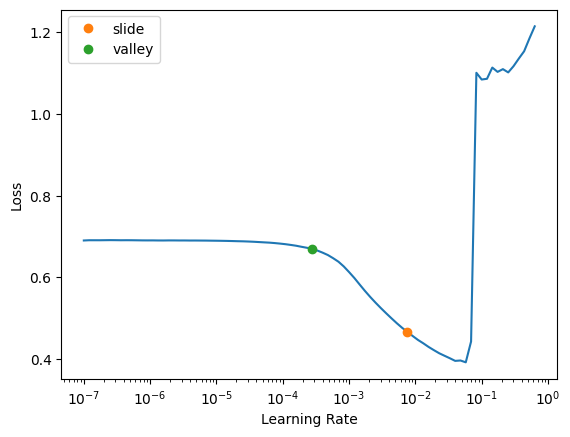

In [28]:
learner.lr_find(suggest_funcs=[slide, valley])

In [29]:
learner.fit_one_cycle(2,3.8e-3)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [30]:
learner.save("question-classifier-stage-0")

Path('models/question-classifier-stage-0.pth')

# Stage - 1

In [ ]:
# learner.load("question-classifier-stage-0")

In [31]:
learner.unfreeze()

SuggestedLRs(slide=0.0005754399462603033, valley=3.0199516913853586e-05)

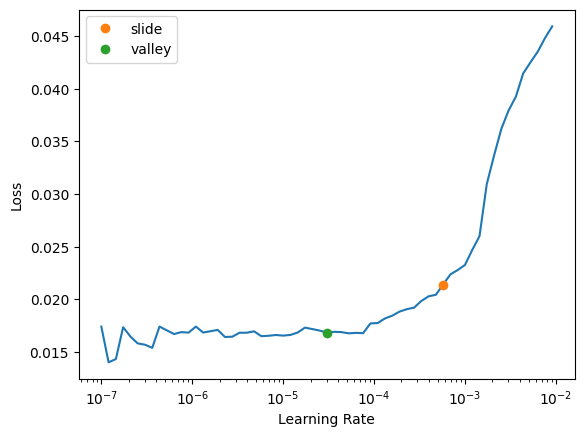

In [32]:
learner.lr_find(suggest_funcs=[slide, valley])

In [33]:
learner.fit_one_cycle(3,slice(4.5e-4, 3.5e-5))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [34]:
learner.save("question-classifier-stage-1")

Path('models/question-classifier-stage-1.pth')

In [35]:
learner.export(f"../../models/{model_name}/question-classifier-stage-1.pkl")